In [1]:
#Creted by : Sanjay Kumar N

In [2]:
import numpy as np  
import pandas as pd  

In [3]:
#Python method to get the csv path
def getData(path):
    path=path
    inputData = pd.read_csv(path)
    initData=inputData
    return inputData,initData

In [4]:
#Python method for handling nan values
#Numerical columns replaced with mean
#String columns replaced with mode
from collections import Counter
def dataCleaning(inputData,features,uniqueId,target):
    
    #if(uniqueId!=""):
    #    inputData = inputData.drop(uniqueId, axis=1)
    updatedData =  inputData[target]   
    dataForClean=pd.DataFrame()
    dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[uniqueId])],axis=1)
    for i in range(0,len(features)):
        dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[features[i]])],axis=1)
    dataForClean=pd.concat([dataForClean,pd.DataFrame(inputData[target])],axis=1)
    inputData=dataForClean
    for i in range(0,len(inputData.columns)):
        colName=inputData.columns[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colName != uniqueId):
            mode=Counter(inputData[colName])
            modeval= mode.most_common(1)[0][0]
            inputData[colName]= inputData[colName].replace(np.NaN, modeval)
        else:
            inputData[colName]= inputData[colName].replace(np.NaN, np.mean(inputData[colName]))
    
    return inputData,updatedData

In [5]:
#Python method for pre-processing the data
#Categorical variables are label and one hot encoded
def dataPreProcess(inputData,target):
    from sklearn import preprocessing 
    labelencoder= preprocessing.LabelEncoder()
    onehotencoder = preprocessing.OneHotEncoder(sparse=False)
    notencoded = pd.DataFrame()
    encoded = pd.DataFrame()
    colNames=[]
    for i in range(0,len(inputData.columns)):
        colNames.append(inputData.columns[i])
        
    for i in range(0,len(colNames)):
        colName=colNames[i]
        if( (inputData[colName].dtype.name=="object" and inputData[colName].dtype.name!= target) and colNames[i] != uniqueId):
            df =  labelencoder.fit_transform(inputData[colName])
            df = np.array(inputData[colName])
            df =   df.reshape(len(df),1)
            onehot_encoded = onehotencoder.fit_transform(df)
            onehot_encoded = pd.DataFrame(onehot_encoded)
            #onehot_encoded = onehot_encoded.drop(len(onehot_encoded.columns)-1,axis=1)
            encoded=pd.concat([onehot_encoded,encoded],axis=1)       
        else:
            notencoded=  pd.concat([notencoded,inputData[colName]],axis=1)
    combinedData=pd.concat([encoded,notencoded],axis=1)
    updatedData=pd.DataFrame()
    updatedData=pd.concat([updatedData,combinedData],axis=1) 
    Y = pd.DataFrame() 
    Y = pd.DataFrame(updatedData[target])
    del updatedData[target]
    X = pd.DataFrame()
    X = updatedData 
   
    return X,Y

In [6]:
def datasplit(X,Y,size):
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=size, shuffle=False)
    return X_train, X_test, Y_train, Y_test

In [7]:
#Python method for performing logistic regression
def logisticRegression(X_train, X_test, Y_train, Y_test):
    from sklearn.linear_model import LogisticRegression
    regressor = LogisticRegression()
    regressor.fit(X_train,Y_train)        
    predictions = regressor.predict(X_test)
    predictionsnew = regressor.predict(X_test) 
    score = regressor.score(X_test, Y_test)
    from sklearn import metrics       
    cm = metrics.confusion_matrix(Y_test, predictions)
    return predictions,score,cm

In [8]:
#Calling all the fuctions step by step
path="F:\\Datasets\\Titanic\\train.csv"
uniqueId = "PassengerId"
target = "Survived"
features = ["Pclass","Name","Sex","Age","SibSp","Parch","Fare","Embarked"]


testsize=0.2
data,initData  = getData(path)
print(data.dtypes)

if(uniqueId==""):
    uniqueId=uniqueId
    uniqueIdGenerator=np.arange(1,len(data))
    UqId=pd.DataFrame(list(uniqueIdGenerator),columns=["UniqueId"])
    data=pd.concat([UqId,data],axis=1) 
    
data,updatedData=dataCleaning(data,features,uniqueId,target)

X,Y=dataPreProcess(data,target)
X_train, X_test, Y_train, Y_test=datasplit(X,Y,testsize)
predictions,score,cm=logisticRegression(X_train, X_test, Y_train, Y_test)
n=len(data)
p=len(features)
adjr= 1-(1-score)*(n-1)/(n-p-1)
output1=pd.DataFrame(list(Y_test[target]),columns=["Actual"])
output2=pd.DataFrame(list(predictions),columns=["Predicted"])
prednactual=pd.concat([output1,output2],axis=1)
testStart=data[uniqueId][len(X_train):len(data)]
testStart=pd.DataFrame(testStart,columns=[uniqueId])
testStart.reset_index(drop=True, inplace=True)
prednactual.reset_index(drop=True, inplace=True)
prednactualfinal=pd.concat([testStart,prednactual],axis=1)
truePositive = cm[0,0]
falsePositive= cm[1,0]
trueNegative= cm[1,1]
falseNegative=cm[0,1]
accuracy= (truePositive + trueNegative) / (truePositive+falsePositive+trueNegative+falseNegative)
precision= (truePositive) /(truePositive + falsePositive)
recall=   (truePositive) /(truePositive+falseNegative)
f1score= (2*precision*recall) / (precision+recall)

print(".........InputData............")
print(initData.head(5))

print(".............Unique and target variables..............")
print("UniqueId: ",uniqueId)
print("Target variable: ",target)

print(".........Input Data............")
print(data.head(5))


print(".........Output Data............")
print(prednactualfinal.head(5))

print(".............Evaluation metrics..............")
print("Accuracy: ",score)
print("cm: ",cm)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1Score: ",f1score)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
.........InputData............
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


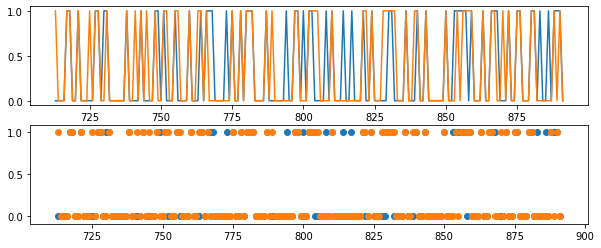

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10,4))
y_axis_pred = prednactualfinal["Predicted"]
y_axis_actual = prednactualfinal["Actual"]
x_axis= prednactualfinal[uniqueId]
axes[0].plot(x_axis,y_axis_pred)
axes[0].plot(x_axis,y_axis_actual)
axes[1].scatter(x_axis,y_axis_pred)
axes[1].scatter(x_axis,y_axis_actual)
plt.show()
